# Explore here

CLIENT_ID: f7746b9e91554e798fea1845917d13a5
CLIENT_SECRET: 3806b002e6a44c26b58bcef052af59a4
                         Track  Popularidad Duración (min:seg)
0         Freedom - Radio Edit           33               3:26
1        2 Sexy - Original Mix           25               5:51
2                    The Truth           24               2:42
3                Get Down Baby           24               6:22
4                   Shake Girl           24               3:59
5       Hum Hum - Tapesh Remix           20               6:21
6              Are You Ready ?           19               6:05
7  Thinking About - Frey Remix           15               5:42
8            Can You Handle It           19               6:04
9      My Feeling - Radio Edit           17               3:36


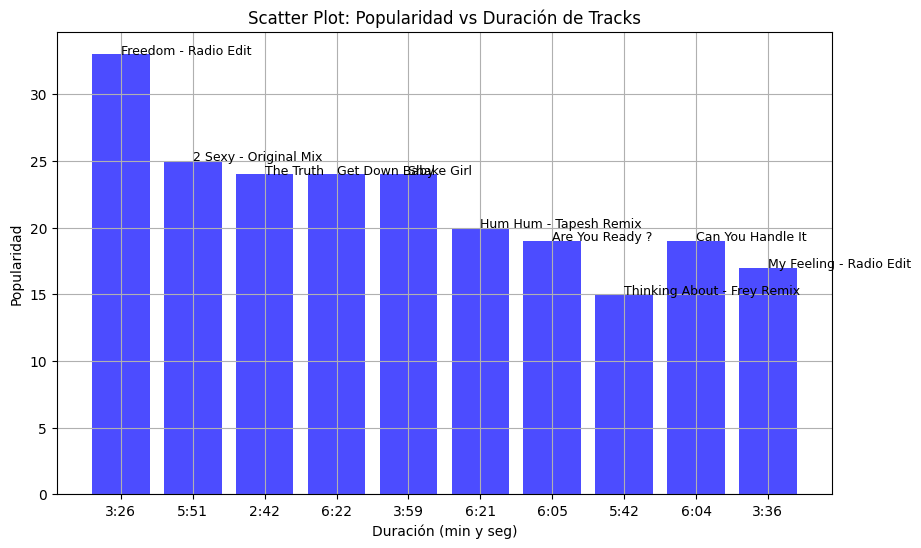

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


#Cargar las variables del archivo .env
#No funcionara si pones un nombre al archivo .env,
#ademas as de poner el valor del clientid y el secretid 
#sin comillas.
load_dotenv()

#Obtener las credenciales de Spotify, 
#nos aseguramos
#que carguen
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")
print(f"CLIENT_ID: {client_id}")
print(f"CLIENT_SECRET: {client_secret}")
#Verificar que se hayan
#cargado correctamente 
#con un simple if
if not client_id or not client_secret:
    raise ValueError("CLIENT_ID o CLIENT_SECRET no están definidos correctamente.")
# Autenticación con Spotify 
# usando SpotifyClientCredentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

#Obtener los 10 mejores tracks 
#del artista, en este caso del sello de DJ-s
#Tech-house belga.
artist_id = "2hTnSPLuF54jseC35e210D"  # ID de ejemplo del artista
response = sp.artist_top_tracks(artist_id)
# Mostrar los resultados
#Creamos una lista vacia
#donde almacenar los datos
tracks_data = []
for track in response['tracks'][:10]:
    nombre_track = track['name']
    popularidad_track = track['popularity']
    duracion_track = track['duration_ms']

    # Convertir la duración de milisegundos a minutos y segundos
    track_duration_min = duracion_track // 60000
    track_duration_sec = (duracion_track % 60000) // 1000

    # Formatear la duración como "minutos:segundos"
    track_duration_formatted = f"{track_duration_min}:{track_duration_sec:02d}"

    # Agregar los datos a la lista
    tracks_data.append({
        "Track": nombre_track,  # Usar la variable nombre_track
        "Popularidad": popularidad_track,  # Usar la variable popularidad_track
        "Duración (min:seg)": track_duration_formatted,  # Usar la variable track_duration_formatted
    })

# Crear un DataFrame a partir de los datos recopilados
infotracks = pd.DataFrame(tracks_data)

# Mostrar el DataFrame
print(infotracks)
# Graficar un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(infotracks["Duración (min:seg)"], infotracks["Popularidad"], color='green', alpha=0.7)
plt.title('Scatter Plot: Popularidad vs Duración de Tracks')
plt.xlabel('Duración (min y seg)')
plt.ylabel('Popularidad')
plt.grid(True)

# Mostrar etiquetas de nombre de cancion para cada punto
for i in range(len(infotracks)):
    plt.annotate(infotracks["Track"][i], (infotracks["Duración (min:seg)"][i], infotracks["Popularidad"][i]), fontsize=9)

plt.show()



Conclusion:La calidad musical de una cancion y su popularidad no tiene nada que ver con la duración del track, a no ser que seas natch scratch y aburras a las obejas.